### <p style="color:orange" align="center">Convolutional Neural Network</p>

Image Classification using CNN (Cifar10 dataset)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

2022-10-26 17:47:18.528204: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-26 17:47:33.926085: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-26 17:47:33.926172: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-26 17:47:34.423792: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-26 17:47:53.387439: W tensorflow/stream_executor/platform/de

#### Loading data from keras dataset cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [27]:
y_train = y_train.reshape(-1,)


In [34]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [23]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
def plot_sample(X,y,i):
    plt.figure(figsize=(5,2))
    plt.imshow(X[i])
    plt.title(classes[y[i]])

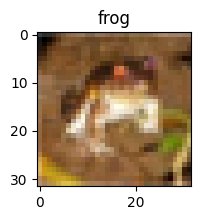

In [24]:
plot_sample(X_train,y_train,0)

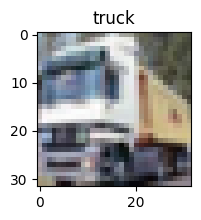

In [8]:
plot_sample(X_train,y_train,1)

In [9]:
X_train = X_train / 255
X_test = X_test / 255

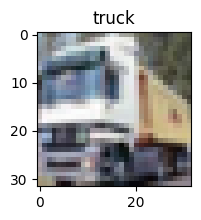

In [10]:
plot_sample(X_train,y_train,1)

In [11]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])
    model.compile(
        optimizer='SGD',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [12]:
annModel = get_model()


2022-10-26 17:50:35.714723: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-26 17:50:35.728010: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-26 17:50:35.728173: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (karthikeya): /proc/driver/nvidia/version does not exist
2022-10-26 17:50:35.751117: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-26 17:50:36.406448: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 36864000 exceeds

In [13]:
annModel.fit(X_train,y_train,epochs=5)

2022-10-26 17:50:57.378015: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/5
   5/1563 [..............................] - ETA: 1:04 - loss: 2.4703 - accuracy: 0.0625

2022-10-26 17:51:02.658246: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 36864000 exceeds 10% of free system memory.


1563/1563 [==============================] - 63s 39ms/step - loss: 1.8096 - accuracy: 0.3543
Epoch 2/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6230 - accuracy: 0.4248
Epoch 3/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5401 - accuracy: 0.4584
Epoch 4/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4809 - accuracy: 0.4794
Epoch 5/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4296 - accuracy: 0.4982


In [33]:
annModel.evaluate(X_test,y_test)

313/313 [==============================] - 6s 12ms/step - loss: 1.4925 - accuracy: 0.4669


[1.4924943447113037, 0.4668999910354614]

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = annModel.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]

print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

           0       0.54      0.57      0.56      1000
           1       0.71      0.43      0.54      1000
           2       0.39      0.28      0.33      1000
           3       0.37      0.29      0.33      1000
           4       0.34      0.54      0.42      1000
           5       0.47      0.24      0.32      1000
           6       0.55      0.45      0.49      1000
           7       0.39      0.73      0.51      1000
           8       0.76      0.45      0.56      1000
           9       0.47      0.69      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [16]:
from keras import layers, Sequential

cnnModel = Sequential([
    #cnn
    layers.Conv2D(filters=y_test[0]32, activation='relu', kernel_size=(3,3), input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnnModel.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
cnnModel.fit(X_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 1.5088 - accuracy: 0.4531
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1812 - accuracy: 0.5848
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0396 - accuracy: 0.6375
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9513 - accuracy: 0.6683
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8771 - accuracy: 0.6954
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8256 - accuracy: 0.7143
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7793 - accuracy: 0.7305
Epoch 8/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7461 - accuracy: 0.7431
Epoch 9/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7099 - accuracy: 0.7547
Epoch 10/10
1563/1563 [==============================] - 33s 21m

In [19]:
cnnModel.evaluate(X_test,y_test)

313/313 [==============================] - 5s 13ms/step - loss: 0.9164 - accuracy: 0.6983


[0.916441798210144, 0.6983000040054321]

Text(0.5, 1.0, 'ship')

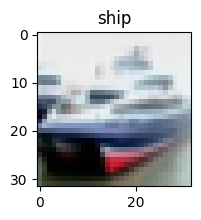

In [43]:
plt.figure(figsize=(5,2))
plt.imshow(X_test[1])
plt.title(classes[y_test[1][0]])

In [47]:
y_pred_cnn = cnnModel.predict(X_test)
y_pred_cnn_classes = [np.argmax(i) for i in y_pred_cnn]

print(classification_report(y_test,y_pred_cnn_classes))

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1000
           1       0.87      0.77      0.82      1000
           2       0.55      0.63      0.58      1000
           3       0.57      0.45      0.50      1000
           4       0.68      0.56      0.61      1000
           5       0.58      0.66      0.62      1000
           6       0.77      0.78      0.78      1000
           7       0.66      0.79      0.72      1000
           8       0.79      0.82      0.80      1000
           9       0.80      0.77      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

